In [27]:
import numpy as np
import healpy as hp
import matplotlib.pyplot as plt
from src.Calculators.ray_maker import lin_ray_maker
from src.Calculators.ray_cesare import ray_maker
from src.Luminosity.special_radii import get_thermr, get_photosphere, calc_photosphere
from src.Luminosity.thermR import get_lin_thermr
from src.Luminosity.photosphere import get_lin_photosphere
fix = 844
m = 6
Rt = (10**m)**(1/3)

In [5]:
lin_rays_T, lin_rays_den, _, lin_radii = lin_ray_maker(fix, m)

/Users/paolamartire/miniconda3/envs/tde_comparison/lib/python3.9/site-packages/numba/core/ir_utils.py:2149: NumbaPendingDeprecationWarning: 
Encountered the use of a type that is scheduled for deprecation: type 'reflected list' found for argument 'observers' of function 'THROUPLE_S_CASTERS'.

For more information visit https://numba.readthedocs.io/en/stable/reference/deprecation.html#deprecation-of-reflection-for-list-and-set-types

File "src/Calculators/legion_of_casters.py", line 12:
@numba.njit
def THROUPLE_S_CASTERS(radii, R,
^

  warnings.warn(NumbaPendingDeprecationWarning(msg, loc=loc))


In [6]:
lin_rays_kappa, _, _ = get_lin_photosphere(lin_rays_T, lin_rays_den, lin_radii)

In [7]:
lin_plot_kappa = np.zeros((len(lin_rays_kappa),len(lin_radii)))
for i in range(len(lin_rays_kappa)):
    for j in range(len(lin_rays_kappa[i])):
        temp = lin_rays_kappa[i][j]
        lin_plot_kappa[i][-j-1] = temp
        if temp > 5:
            lin_plot_kappa[i][0:-j] = temp
            break
    lin_plot_kappa[i,0:-j] = temp

In [8]:
lin_step = lin_radii[1]-lin_radii[0]
for j in range(0,len(lin_radii)-2):
    for i in range(len(lin_plot_kappa)):
        lin_plot_kappa[i,j] /= lin_step

/var/folders/s6/3n46ppqn3jx7765w8c686c740000gn/T/ipykernel_87102/2074536801.py:5: RuntimeWarning: divide by zero encountered in power
  kram = 3.68 * 1e22 * (1 + 0.7389) * data_lin_T**(-3.5) * data_lin_den**2 #Kramers' opacity [cm^2/g]
/var/folders/s6/3n46ppqn3jx7765w8c686c740000gn/T/ipykernel_87102/2074536801.py:5: RuntimeWarning: invalid value encountered in multiply
  kram = 3.68 * 1e22 * (1 + 0.7389) * data_lin_T**(-3.5) * data_lin_den**2 #Kramers' opacity [cm^2/g]


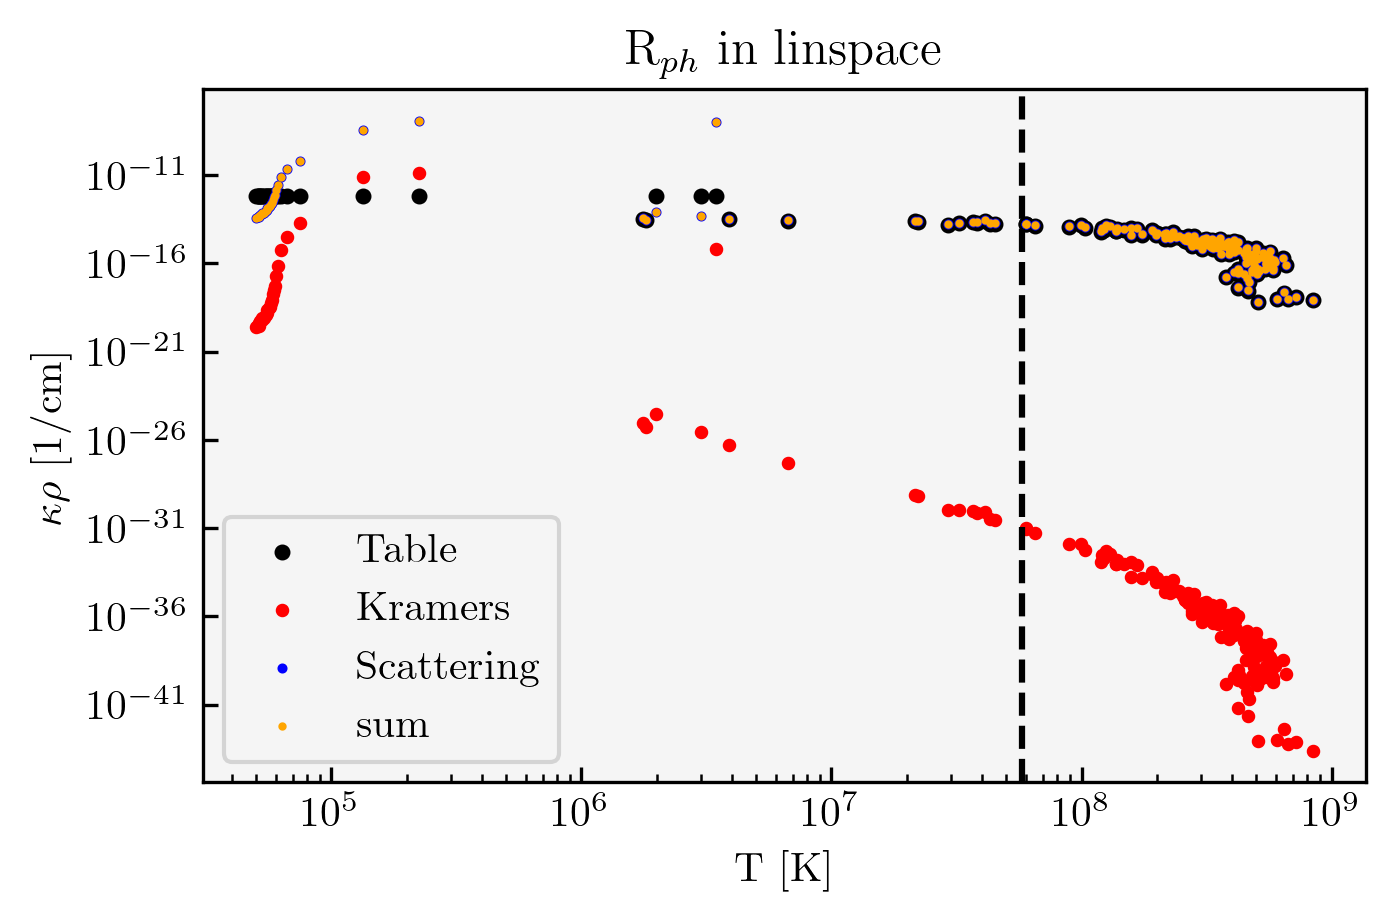

In [24]:
index = 91
data_lin_den = lin_rays_den[index]
data_lin_T = lin_rays_T[index]
kappa_lin = lin_plot_kappa[index]
kram = 3.68 * 1e22 * (1 + 0.7389) * data_lin_T**(-3.5) * data_lin_den**2 #Kramers' opacity [cm^2/g]
scattering_lin = (1+0.7389) * 0.2 * data_lin_den 
sum_lin =  (kram + scattering_lin) 
plt.scatter(data_lin_T,kappa_lin, s = 8, c = 'k', label = 'Table')
plt.scatter(data_lin_T, kram, s = 5, c = 'r', label = 'Kramers')
plt.scatter(data_lin_T, scattering_lin, s = 2, c = 'b', label = 'Scattering')
plt.scatter(data_lin_T,sum_lin, s = 1, c = 'orange', label = 'sum')
plt.legend()
plt.axvline(x=np.exp(17.87), c = 'k', linestyle = 'dashed')
plt.xlabel('T [K]')
plt.ylabel(r'$\kappa\rho$ [1/cm]')
plt.loglog()
plt.title(r'R$_{ph}$ in linspace')
plt.savefig('photosphere_comparison_lin.png')
plt.show()

In [9]:
rays_T, rays_den, _, radii = ray_maker(fix, m, 1200)

In [11]:
rays_kappa, _, _ = get_photosphere(rays_T, rays_den, radii)

In [12]:
plot_kappa = np.zeros((len(rays_kappa),len(radii)))
for i in range(len(rays_kappa)):
    for j in range(len(rays_kappa[i])):
        temp = rays_kappa[i][j]
        plot_kappa[i][-j-1] = temp
        if temp > 5:
            plot_kappa[i][0:-j] = temp
            break
    plot_kappa[i,0:-j] = temp

In [13]:
for j in range(0,len(radii)-2):
    step = radii[j+1]-radii[j]
    for i in range(len(plot_kappa)):
        plot_kappa[i,j] /= step

/var/folders/s6/3n46ppqn3jx7765w8c686c740000gn/T/ipykernel_87102/3394859727.py:4: RuntimeWarning: divide by zero encountered in power
  kram = 3.68 * 1e22 * (1 + 0.7389) * data_T**(-3.5) * data_den**2 #Kramers' opacity [cm^2/g]
/var/folders/s6/3n46ppqn3jx7765w8c686c740000gn/T/ipykernel_87102/3394859727.py:4: RuntimeWarning: invalid value encountered in multiply
  kram = 3.68 * 1e22 * (1 + 0.7389) * data_T**(-3.5) * data_den**2 #Kramers' opacity [cm^2/g]


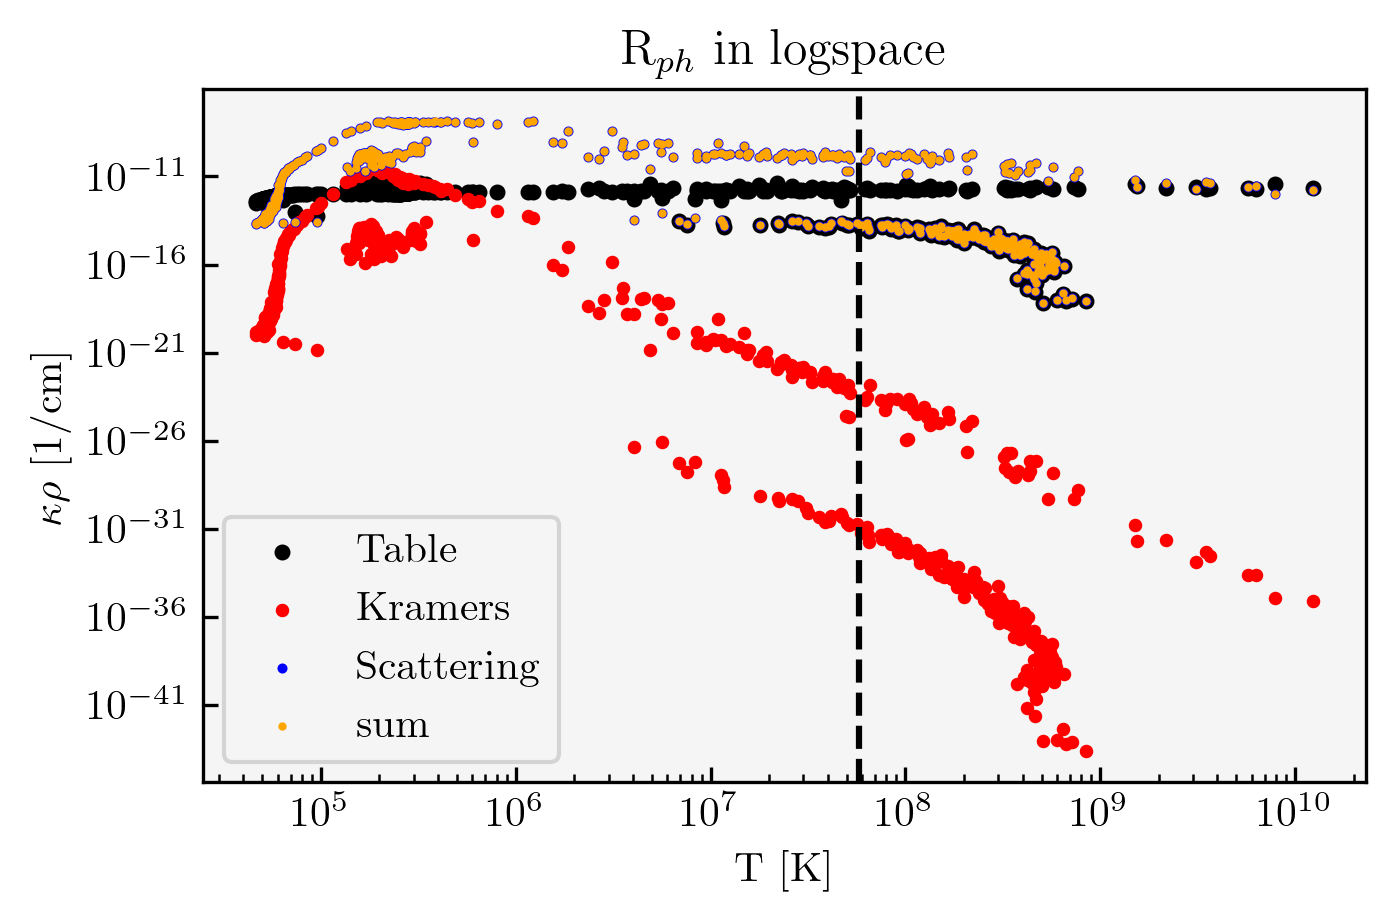

In [47]:
data_den = rays_den[index]
data_T =rays_T[index]
kappa = plot_kappa[index]
kram = 3.68 * 1e22 * (1 + 0.7389) * data_T**(-3.5) * data_den**2 #Kramers' opacity [cm^2/g]
scattering = (1+0.7389) * 0.2 * data_den 
sum =  (kram + scattering) 
plt.scatter(data_T,kappa, s = 8, c = 'k', label = 'Table')
plt.scatter(data_T, kram, s = 5, c = 'r', label = 'Kramers')
plt.scatter(data_T, scattering, s = 2, c = 'b', label = 'Scattering')
plt.scatter(data_T,sum, s = 1, c = 'orange', label = 'sum')
plt.legend()
plt.axvline(x=np.exp(17.87), c = 'k', linestyle = 'dashed')
plt.xlabel('T [K]')
plt.ylabel(r'$\kappa\rho$ [1/cm]')
plt.loglog()
plt.title(r'R$_{ph}$ in logspace')
plt.savefig('Final plot/photosphere_comparison_log.png')
plt.show()

In [44]:
rays_T_test = np.linspace(1e5, 1e10, len(radii))
den_test = np.ones(len(rays_T_test)) * np.exp(-20)
kappas_test, _, _ = calc_photosphere(rays_T_test, den_test, radii)

In [45]:
plot_kappa_test = np.zeros(len(radii))
for j in range(len(kappas_test)):
    temp = kappas_test[j]
    plot_kappa_test[-j-1] = temp
    if temp > 5:
        plot_kappa_test[0:-j] = temp
        break
plot_kappa_test[0:-j] = temp
    
for j in range(0,len(radii)-2):
    step = radii[j+1]-radii[j]
    plot_kappa_test[j] /= step

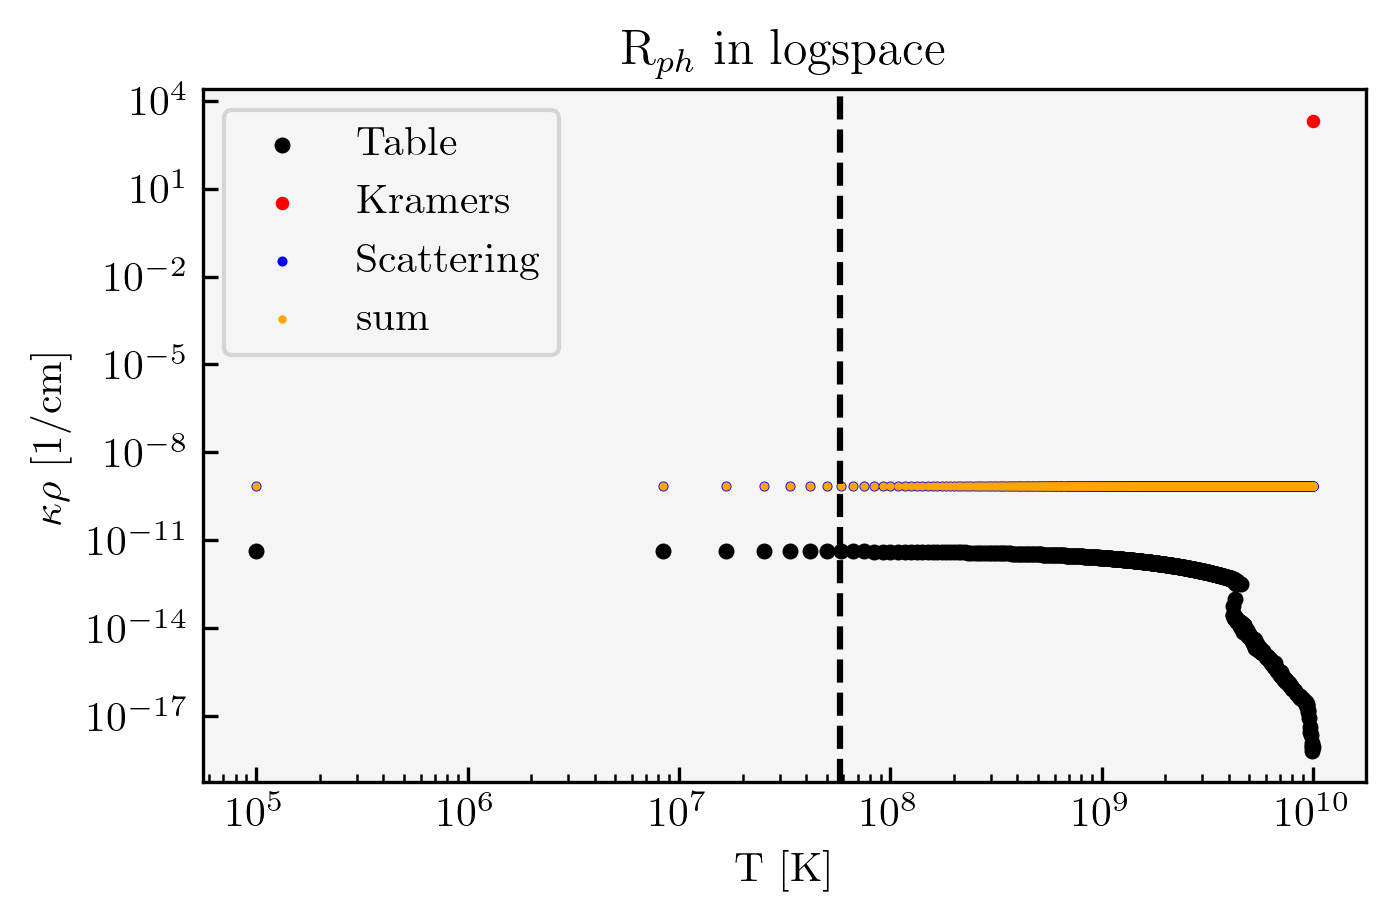

In [46]:
kram = 3.68 * 1e22 * (1 + 0.7389) * rays_T_test**(-3.5) * den_test**2 #Kramers' opacity [cm^2/g]
scattering = (1+0.7389) * 0.2 * den_test 
sum =  (kram + scattering) 
plt.scatter(rays_T_test,kappa, s = 8, c = 'k', label = 'Table')
plt.scatter(rays_T_test, plot_kappa_test, s = 5, c = 'r', label = 'Kramers')
plt.scatter(rays_T_test, scattering, s = 2, c = 'b', label = 'Scattering')
plt.scatter(rays_T_test,sum, s = 1, c = 'orange', label = 'sum')
plt.legend()
plt.axvline(x=np.exp(17.87), c = 'k', linestyle = 'dashed')
plt.xlabel('T [K]')
plt.ylabel(r'$\kappa\rho$ [1/cm]')
plt.loglog()
plt.title(r'R$_{ph}$ in logspace')
plt.show()